## Statistical analysis on the bacteria colonies

Start by reading the the .csv file from the previous step.

Print the first few lines to see some of the data.

In [10]:
import pandas as pd

df = pd.read_csv("../data/bacteria_results_total.csv")
# Summary of all numeric columns
print(df.head())

   Unnamed: 0   area  feret_diameter_max bacteria     drug
0           0  593.0           28.792360       b1  control
1           1  485.0           26.248809       b1  control
2           2  593.0           28.792360       b1  control
3           3  593.0           28.792360       b1  control
4           4  594.0           28.792360       b1  control


### Caclulate the mean area of the different colonies

Now, we have seen how to use the ```mean()``` function on a data frame. What do you get if you calculate the mean of the area now?

In [11]:
# Summary of all numeric columns
print(df['area'].mean())



467.2961876832845


This is probably not what we want.
Right now we would like the area of each bacteria type and drug type.

We can do that by using a function called ```groupby(...)``` and give the column we want to group by.

Try with grouping by "bacteria" and see what happens. 


In [12]:
# group by bacteria and calculate the mean area for each bacteria type
df.groupby("bacteria")["area"].mean()

bacteria
b1    361.221239
b2    468.356522
b3    572.292035
Name: area, dtype: float64

We are close now :)

It turns out ```groupby()``` is really nice. It lets us give an array of column names to group by. Which feels like what we want.

To create an array 'on the fly' use square brackets [ ] around your strings.

```groupy['column1','column2'])```

In [13]:
#gruop by bacteria and drug and calculate the mean area for each combination
df.groupby(["bacteria","drug"])["area"].mean()

bacteria  drug   
b1        control    524.576923
          d1         439.448276
          d2         297.300000
          d3         197.000000
b2        control    644.633333
          d1         531.172414
          d2         408.700000
          d3         263.730769
b3        control    744.310345
          d1         643.758621
          d2         528.700000
          d3         342.160000
Name: area, dtype: float64

HEUREKA!!

So group by gives us a nice way to compile statistics according to several variables.

We can also plot the values. For example, we can make histograms of the data we are interested in

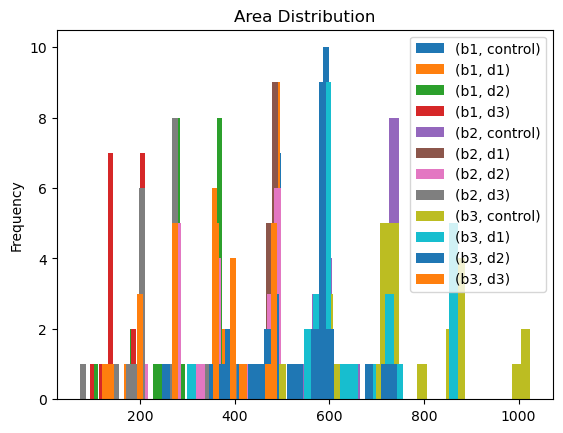

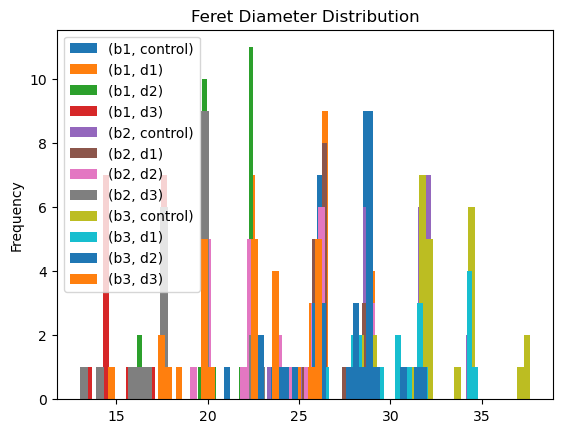

In [14]:
import matplotlib.pyplot as plt

data_area = df.groupby(["bacteria","drug"])["area"]

# Histogram of Math scores
data_area.plot(kind="hist", bins=30, title="Area Distribution")
plt.legend()
plt.show()

data_feret = df.groupby(["bacteria","drug"])["feret_diameter_max"]
data_feret.plot(kind="hist", bins=30, title="Feret Diameter Distribution")
plt.legend()
plt.show()



The function ```agg()``` allows us to aggregate data in convenient ways in its own data frame.

In [15]:
agg_stats = df.groupby(["drug", "bacteria"]).agg({
    "area": ["mean", "std", "min", "max"]
})
print(agg_stats)

                        area                           
                        mean         std    min     max
drug    bacteria                                       
control b1        524.576923   91.984422  357.0   741.0
        b2        644.633333  135.639350  259.0   869.0
        b3        744.310345  147.243992  428.0  1025.0
d1      b1        439.448276   99.353836  165.0   597.0
        b2        531.172414   90.529423  367.0   741.0
        b3        643.758621  134.799760  299.0   871.0
d2      b1        297.300000   70.582380  101.0   392.0
        b2        408.700000  115.604901  174.0   595.0
        b3        528.700000  109.809914  247.0   742.0
d3      b1        197.000000   74.053534   74.0   365.0
        b2        263.730769   99.607453   72.0   489.0
        b3        342.160000  113.302942  120.0   489.0


We can even aggregate data for more variables.

In [16]:
# Multiple aggregations
agg_stats = df.groupby(["bacteria","drug"]).agg({
    "feret_diameter_max": ["mean", "std", "min", "max"],
    "area": ["mean", "std"]
})
print(agg_stats)


                 feret_diameter_max                                  \
                               mean       std        min        max   
bacteria drug                                                         
b1       control          27.114244  2.202387  22.472205  32.015621   
         d1               24.854338  2.656493  18.248288  29.154759   
         d2               20.729576  2.021777  16.155494  23.769729   
         d3               16.965834  2.663143  13.038405  22.472205   
b2       control          30.119531  2.615705  23.259407  34.481879   
         d1               27.322365  2.131087  23.769729  32.015621   
         d2               23.932504  3.205909  17.464249  29.154759   
         d3               19.383991  3.260571  13.000000  26.248809   
b3       control          32.252438  2.768615  26.248809  37.656341   
         d1               30.027829  2.601888  25.709920  34.785054   
         d2               27.294766  2.631847  20.880613  32.015621   
      

### Pivot table
Another way to organise the data is with a pivot table. Pandas can of course do this as well with a function called ```pivot_table```

The parameters to the function, in this case, are:

```values```: the value we are interested in

```index```: the variable that will be the rows in the table

```columns```: the variable that will be the columns in the table

```aggfunc```: the functions we want to use to calculate/manipulat the values in the table

In [17]:
pivot = df.pivot_table(
    values=["area"],
    columns=["drug"],
    index=["bacteria"],
    aggfunc=["mean"]
)
print(pivot)

                mean                               
                area                               
drug         control          d1     d2          d3
bacteria                                           
b1        524.576923  439.448276  297.3  197.000000
b2        644.633333  531.172414  408.7  263.730769
b3        744.310345  643.758621  528.7  342.160000


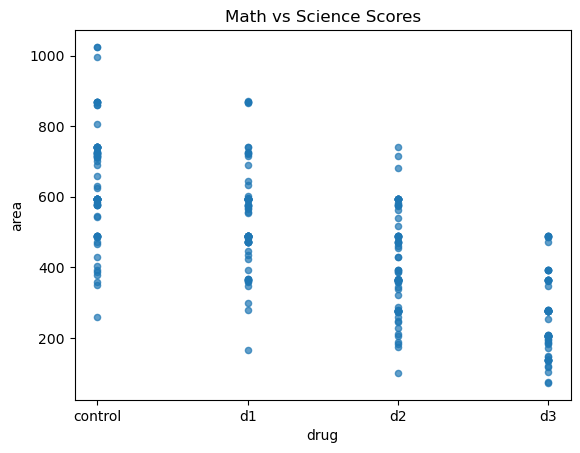

In [18]:
# Scatter plot to see relation between Math and Science scores
df.plot(kind="scatter", x="drug", y="area", alpha=0.7)
plt.title("Math vs Science Scores")
plt.show()